In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import random


## Unidimensional minimization

### Quadratic form
$$
\min_{ {\mathbf x}\in {\mathbb R^n} } {\mathbf x}^T Q  {\mathbf x} +   {\mathbf q}^T{\mathbf x}
$$

Where $\nabla f(\mathbf x)= 2Q\mathbf x + \mathbf q$ 

In [3]:
def gradient_method_quadratic(Q, q, x, MAX_ITER=100, epsilon=1e-5):
    # function and its gradient
    quadratic = lambda x: np.dot(x, Q @ x) + np.dot(q, x)
    gradient = lambda x: 2 * Q @ x + q
    iter = 0
    x_collect = [x.copy()]
    d = gradient(x)
    while la.norm(d) > epsilon:
        iter += 1
        alpha = 0.5 * np.dot(d, d) / np.dot(Q @ d, d)
        d = gradient(x)
        x = x - alpha * d
        func_val = quadratic(x)
        print(f"{iter:02d}, {la.norm(d):0.12f}, {func_val:0.8g}")
        x_collect.append(x)
    return np.array(x_collect)


In [4]:
A = np.array([[1, 0],
              [0, 2.]])


b = np.array([0, 0.0])

x0 = np.array([2, 1.0])

print("k   norm_gradient   function value")
x_collect = gradient_method_quadratic(A, b, x0)


k   norm_gradient   function value
01, 5.656854249492, 0.66666667
02, 1.885618083164, 0.074074074
03, 0.628539361055, 0.0082304527
04, 0.209513120352, 0.00091449474
05, 0.069837706784, 0.00010161053
06, 0.023279235595, 1.1290059e-05
07, 0.007759745198, 1.2544509e-06
08, 0.002586581733, 1.3938344e-07
09, 0.000862193911, 1.5487049e-08
10, 0.000287397970, 1.7207832e-09
11, 0.000095799323, 1.9119813e-10
12, 0.000031933108, 2.1244237e-11
13, 0.000010644369, 2.3604708e-12
14, 0.000003548123, 2.6227453e-13


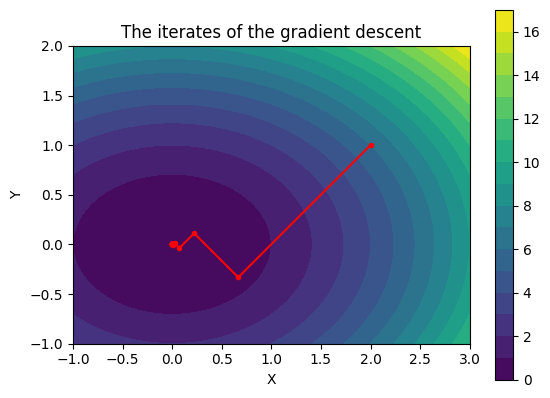

In [5]:
x = np.linspace(-1, 3)
y = np.linspace(-1, 2)
X, Y = np.meshgrid(x, y)

Z = X**2 * A[0, 0] + X * Y * (A[0, 1] + A[0, 1]) + Y**2 * A[1, 1]

plt.contourf(X, Y, Z, 20)
plt.title("The iterates of the gradient descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("scaled")
plt.plot(x_collect[:, 0], x_collect[:, 1], c='r', marker='.')
plt.colorbar()
plt.show()


### Armijo rule
Armijo's inequality
$$f(\mathbf {x}^k + \alpha \mathbf {d}^k) \le f(\mathbf {x}^k) + \sigma\alpha <\nabla f(\mathbf {x}^k), \mathbf {d}^k>\\$$

In [6]:
def step_armijo(f, grad_f, x, MAX_ITER=100):
    # return step size alpha of armijo rule
    alpha = 2  # initial, step size
    theta = 0.5
    sigma = 0.1
    for _ in range(MAX_ITER):
        d = -grad_f(x)
        if f(x + alpha * d) <= f(x) + sigma * alpha * np.dot(-d, d):
            return alpha
        alpha *= theta
 

In [7]:
def armijo(f, grad_f, x, eps=1e-3, MAX_ITER=1000):
    print(f"{0:02d}, {x}")
    for i in range(1, MAX_ITER):
        alpha = step_armijo(f, grad_f, x)
        d = -grad_f(x)
        x = x + alpha * d
        error = la.norm(d)
        print(f"{i:02d}, {x}, {error:0.12f}")
        if error < eps:
            return x
    return None


In [8]:
x0 = np.array([0, 3.0])

print("k\tx\t\t\t norm_gradient")
f = lambda x: (x[0] - 2)**4 + (x[0] - 2 * x[1])**2
df = lambda x: np.array([4 * (x[0] - 2)**3 + 2 * (x[0] - 2 * x[1]), -4 * (x[0] - 2 * x[1])])
armijo(f, df, x0)


k	x			 norm_gradient
00, [0. 3.]
01, [2.75 1.5 ], 50.119856344567
02, [2.15625 1.     ], 1.552467793547
03, [2.11528015 1.078125  ], 0.705727159608
04, [2.1247566  1.05764008], 0.180565387105
05, [2.12141662 1.0623783 ], 0.046376736151
06, [2.12135666 1.06070831], 0.013368540005
07, [2.11784208 1.06058838], 0.007033249789
08, [2.11785753 1.05892104], 0.013339296233
09, [2.1145679  1.05895194], 0.006579537509
10, [2.11465    1.05728395], 0.013360025132
11, [2.11155384 1.05744814], 0.006201012272
12, [2.11169535 1.05577692], 0.013417594492
13, [2.10876685 1.05605993], 0.005884279396
14, [2.10896174 1.05438343], 0.013502383376
15, [2.10617952 1.0547732 ], 0.005618774134
16, [2.1064227  1.05308976], 0.013607289865
17, [2.10509579 1.05333294], 0.005396043266
18, [2.10472004 1.05176285], 0.006457709035
19, [2.10384726 1.05236002], 0.008460195417
20, [2.10248021 1.05061446], 0.004434323808
21, [2.10162925 1.0512401 ], 0.008449599890
22, [2.10038085 1.04953819], 0.004221378293
23, [2.099549   

array([2.06058247, 1.03058763])

### Goldstein
Goldstein's inequality

\begin{align*}
f(\mathbf {x}^k + \alpha \mathbf {d}^k) - f(\mathbf {x}^k) \le  \sigma_1\alpha <\nabla f(\mathbf {x}^k), \mathbf {d}^k>\\
\sigma_2\alpha<\nabla f(\mathbf {x}^k), \mathbf {d}^k> \le f(\mathbf {x}^k + \alpha \mathbf {d}^k) - f(\mathbf {x}^k)
\end{align*}

In [9]:
def step_goldstein(f, grad_f, x, MAX_ITER=1000):
    sigma_1 = 0.1
    sigma_2 = 0.2
    alpha_hat = 0
    alpha_u = 0
    alpha = 0.5
    theta_1 = 1.5
    theta_2 = 0.7
    for _ in range(MAX_ITER):
        d = -grad_f(x)
        # paso 1
        inequality_1 = f(x + alpha * d) - f(x) <= sigma_1 * alpha * np.dot(-d, d)
        inequality_2 = sigma_2 * alpha * np.dot(-d, d) <= f(x + alpha * d) - f(x)

        if inequality_1 and inequality_2:
            return alpha
        # paso 2
        if not inequality_1:
            alpha_hat = alpha
            # interpolacion
            alpha = alpha_u + theta_2 * (alpha_hat - alpha_u)
            continue
        # paso 3
        if not inequality_2:
            alpha_u = alpha
            # paso 4
            if alpha_hat == 0:
                alpha = theta_1 * alpha


def wolfe(f, grad_f, x, eps=1e-3, MAX_ITER=100):
    print(f"{0:02d}, {x}")
    for i in range(1, MAX_ITER):
        alpha = step_goldstein(f, grad_f, x0)
        d = -grad_f(x)
        x = x + alpha * d
        error = la.norm(d)
        print(f"{i:02d}, {x}, {error:0.12f}")
        if error < eps:
            return x
    return None


### Wolfe
Wolfe's inequality
\begin{align*}
f(\mathbf {x}^k + \alpha \mathbf {d}^k) \le f(\mathbf {x}^k) + \sigma_1\alpha <\nabla f(\mathbf {x}^k), \mathbf {d}^k>\\
<\nabla f(\mathbf {x}^k + \alpha \mathbf {d}^k), \mathbf {d}^k> \ge \sigma_2<\nabla f(\mathbf {x}^k), \mathbf {d}^k>
\end{align*}

In [10]:
def step_wolfe(f, grad_f, x, MAX_ITER=1000):
    sigma_1 = 0.1
    sigma_2 = 0.2
    alpha_hat = 0
    alpha_u = 0
    alpha = 0.5
    theta_1 = 1.5
    theta_2 = 0.7
    for _ in range(MAX_ITER):
        d = -grad_f(x)
        # paso 1
        inequality_1 = f(x + alpha * d) <= f(x) + sigma_1 * alpha * np.dot(-d, d)
        inequality_2 = np.dot(grad_f(x + alpha * d), d) >= sigma_2 * np.dot(-d, d)

        if inequality_1 and inequality_2:
            return alpha
        # paso 2
        if not inequality_1:
            alpha_hat = alpha
            # interpolacion
            alpha = alpha_u + theta_2 * (alpha_hat - alpha_u)
            continue
        # paso 3
        # si se cumple  y no la desigualdad 2
        if not inequality_2:
            alpha_u = alpha
            # paso 4
            if alpha_hat == 0:
                alpha = theta_1 * alpha


def wolfe(f, grad_f, x, eps=1e-3, MAX_ITER=100):
    print(f"{0:02d}, {x}")
    for i in range(1, MAX_ITER):
        alpha = step_wolfe(f, grad_f, x0)
        d = -grad_f(x)
        x = x + alpha * d
        error = la.norm(d)
        print(f"{i:02d}, {x}, {error:0.12f}")
        if error < eps:
            return x
    return None


In [11]:
x0 = np.array([0, 3.0])

print("k\tx\t\t\t norm_gradient")
f = lambda x: (x[0] - 2)**4 + (x[0] - 2 * x[1])**2
df = lambda x: np.array([4 * (x[0] - 2)**3 + 2 * (x[0] - 2 * x[1]), -4 * (x[0] - 2 * x[1])])
wolfe(f, df, x0)


k	x			 norm_gradient
00, [0. 3.]
01, [3.69754 0.98316], 50.119856344567
02, [1.76227693 1.56509229], 24.047876120228
03, [1.99669696 1.10528381], 6.141689030372
04, [2.03264222 1.03339333], 0.956458742967
05, [2.03836918 1.02191602], 0.152636406886
06, [2.03926833 1.02007973], 0.024330404485
07, [2.03939775 1.01978019], 0.003882991358
08, [2.03940453 1.01972552], 0.000655471099


array([2.03940453, 1.01972552])

## Laboratorio 12

##### a) $f(\mathbf x) = x_{1}^{2} + x_{1} x_{2} + x_{1} + 2 x_{2}^{2} + 8$

In [12]:
fa = lambda x: x[0]**2 + x[0] * x[1] + x[0] + 2 * x[1]**2 + 8
dfa = lambda x: np.array([2 * x[0] + x[1] + 1, x[0] + 4 * x[1]])

x0 = np.array([-2, 1.])

print("alpha_armijo =", step_armijo(fa, dfa, x0))
print("alpha_goldstein =", step_goldstein(fa, dfa, x0))
print("alpha_wolfe =", step_wolfe(fa, dfa, x0))


alpha_armijo = 0.5
alpha_goldstein = 0.878625
alpha_wolfe = 0.5


##### b) $f(\mathbf x) = 7 x_{1}^{2} + 2 x_{1} x_{2} + x_{2}^{2}$

In [13]:
fb = lambda x: 7 * x[0]**2 + 2 * x[0] * x[1] + x[1]**2
dfb = lambda x: np.array([14 * x[0] + 2 * x[1], 2 * x[0] + 2 * x[1]])

x0 = np.array([1, 1.])

print("alpha_armijo =", step_armijo(fb, dfb, x0))
print("alpha_goldstein =", step_goldstein(fb, dfb, x0))
print("alpha_wolfe =", step_wolfe(fb, dfb, x0))


alpha_armijo = 0.125
alpha_goldstein = 0.12004999999999996
alpha_wolfe = 0.12004999999999996


##### c) $f(\mathbf x) = x_{1}^{2} + x_{1} x_{2} + 2 x_{1} x_{3} + 4 x_{2}^{2} + x_{2} x_{3} + 4 x_{3}^{2} + 6$


In [14]:
fc = lambda x: x[0]**2 + x[0] * x[1] + 2 * x[0] * x[2] + 4 * x[1]**2 + x[1] * x[2] + 4 * x[2]**2 + 6
dfc = lambda x: np.array([2 * x[0] + x[1] + 2 * x[2], x[0] + 8 * x[1] + x[2], 2 * x[0] + x[1] + 8 * x[2]])

x0 = np.array([1, 1., 2.])

print("alpha_armijo =", step_armijo(fc, dfc, x0))
print("alpha_goldstein =", step_goldstein(fc, dfc, x0))
print("alpha_wolfe =", step_wolfe(fc, dfc, x0))


alpha_armijo = 0.125
alpha_goldstein = 0.17149999999999996
alpha_wolfe = 0.17149999999999996


##### d) $f(\mathbf x) =\left(x_{1} - 2\right)^{4} + 2 \left(x_{1} - 2 x_{2}\right)^{2}$


In [15]:
fd = lambda x: 4 * (x[0] - 2)**4 + 2 * (x[0] - 2 * x[1])**2
dfd = lambda x: np.array([4 * x[0] - 8 * x[1] + 16 * (x[0] - 2)**3, -8 * x[0] + 16 * x[1]])

x0 = np.array([1, 1.2])

print("alpha_armijo =", step_armijo(fd, dfd, x0))
print("alpha_goldstein =", step_goldstein(fd, dfd, x0))
print("alpha_wolfe =", step_wolfe(fd, dfd, x0))


alpha_armijo = 0.0625
alpha_goldstein = 0.058824499999999974
alpha_wolfe = 0.058824499999999974


##### f) $f(\mathbf x)=\left(x_{1} - 2\right)^{4} + \left(x_{1} - x_{2}\right)^{2}$


In [16]:
ff = lambda x: (x[0] - 2)**4 + (x[0] - x[1])**2
dff = lambda x: np.array([2 * x[0] - 2 * x[1] + 4 * (x[0] - 2)**3, -2 * x[0] + 2 * x[1]])

x0 = np.array([1, 1.2])

print("alpha_armijo =", step_armijo(ff, dff, x0))
print("alpha_goldstein =", step_goldstein(ff, dff, x0))
print("alpha_wolfe =", step_wolfe(ff, dff, x0))


alpha_armijo = 0.125
alpha_goldstein = 0.17149999999999996
alpha_wolfe = 0.17149999999999996


#####  g) $f(\mathbf x)=x_{1}^{4} + \left(x_{1} + x_{2}\right)^{2} + \left(e^{x_{2}} - 1\right)^{2}$


In [17]:
fg = lambda x: x[0]**4 + (x[0] + x[1])**2 + (np.exp(x[1]) - 1)**2
dfg = lambda x: np.array([4 * x[0]**3 + 2 * x[0] + 2 * x[1], 2 * x[0] + 2 * x[1] + 2 * (np.exp(x[1]) - 1) * np.exp(x[1])])

x0 = np.array([-1, 3.0])

print("alpha_armijo =", step_armijo(fg, dfg, x0))
print("alpha_goldstein =", step_goldstein(fg, dfg, x0))
print("alpha_wolfe =", step_wolfe(fg, dfg, x0))

alpha_armijo = 0.00390625
alpha_goldstein = 0.004844450520349996
alpha_wolfe = 0.004844450520349996


##### h) $f(\mathbf x)=\frac{3 x_{1}^{2}}{2} + x_{1} x_{3} - x_{1} + 2 x_{2}^{2} + 2 x_{2} x_{3} - x_{2} + \frac{3 x_{3}^{2}}{2} - x_{3} + 3$


In [18]:
fh = lambda x: 3 * x[0]**2 / 2 + x[0] * x[2] - x[0] + 2 * x[1]**2 + 2 * x[1] * x[2] - x[1] + 3 * x[2]**2 / 2 - x[2] + 3
dfh = lambda x: np.array([3 * x[0] + x[2] - 1, 4 * x[1] + 2 * x[2] - 1, x[0] + 2 * x[1] + 3 * x[2] - 1])

x0 = np.array([1, 1, 1.0])

print("alpha_armijo =", step_armijo(fh, dfh, x0))
print("alpha_goldstein =", step_goldstein(fh, dfh, x0))
print("alpha_wolfe =", step_wolfe(fh, dfh, x0))


alpha_armijo = 0.25
alpha_goldstein = None
alpha_wolfe = 0.24499999999999997


##### i) $f(\mathbf x) = \sum_{i=1}^N (100{(x_{i+1} - x_{i}^2)}^2 + {(1 - x_i)}^2), N=1$

In [19]:
fi = lambda x: (1 - x[0])**2 + 100 * (-x[0]**2 + x[1])**2
dfi = lambda x: np.array([-400 * x[0] * (-x[0]**2 + x[1]) + 2 * x[0] - 2, -200 * x[0]**2 + 200 * x[1]])

x0 = np.array([-1.2, 1])

print("alpha_armijo =", step_armijo(fi, dfi, x0))
print("alpha_goldstein =", step_goldstein(fi, dfi, x0))
print("alpha_wolfe =", step_wolfe(fi, dfi, x0))


alpha_armijo = 0.0009765625
alpha_goldstein = None
alpha_wolfe = 0.001163152569936034


##### j) $f(\mathbf x)=- 2 e^{- \left(x_{1} - 1\right)^{2} - \left(x_{2} - 1\right)^{2}}$

In [20]:
fj = lambda x: -2 * np.exp(-(x[0] - 1)**2 - (x[1] - 1)**2)
dfj = lambda x: np.array([-2 * (2 - 2 * x[0]) * np.exp(-(x[0] - 1)**2 - (x[1] - 1)**2), -2 * (2 - 2 * x[1]) * np.exp(-(x[0] - 1)**2 - (x[1] - 1)**2)])

x0 = np.array([0, 2.5])

print("alpha_armijo =", step_armijo(fj, dfj, x0))
print("alpha_goldstein =", step_goldstein(fj, dfj, x0))
print("alpha_wolfe =", step_wolfe(fj, dfj, x0))


alpha_armijo = 2
alpha_goldstein = None
alpha_wolfe = 8.54296875


#### Bibliografía

